# 1. 워드 임베딩(Word Embedding)
- 단어를 컴퓨터가 이해하고, 효율적으로 처리 할 수 있도록 단어를 벡터화하는 기술
- 단어를 밀집 벡터의 형태로 표현하는 방법
- 워드 임베딩 과정을 통해 나온 결과를 임베딩 벡터
- 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델에 입력으로 사용가능

### 1-1. 인코딩(Endcoding)
- 기계는 자연어를 이해할 수 없기 때문에 데이터를 기계가 이해할 수 있도록 숫자 틈으로 변환하는 작업

- 자연어를 수치화된 벡터로 변환하는 작업



```
# 코드로 형식 지정됨
```

## 102. 희소 표현(Sparse Representaition)
- 원핫 인코딩을 통해 나온 벡터들을 표현하고자 하는 단어의 인덱스 값만 1이고, 나머지 인덱스에는 전부터로 0으로 표현되는 벡터 표현 방법
- 원-핫 인코딩에 만들어지는 벡터를 최소 벡터라함

### 1-3. 희소 벡터의 문제점
- 희소 벡터의 특징은 단어의  개수가 늘어나면 벡터의 차원이 한없이 커진다는것
0 원-핫 벡터는 벡터 표현 방식이 단순하여, 단순이 단어의 출연 여부만을 벡터에 표시 할 수 있음
- 희소 벡터를 이용해 문장 혹은 텍스트 간 유사도를 계산해보면 원하는 유사도 얻기 힘듬

### 1-4. 밀집 표현(Dense Representation)
- 벡터의 차원이 조밀해졌다는 의미
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추는 표현방식
- 자연어를 밀집 표현으로 변환하는 인코딩 과정에서 0과 1의 binary 값이 아니라 , 연속적인 실수 값을 가질 수 있음
- 더 큰 일반화 능력을 가지고 있음

### 1-5. 원-핫 벡터와 워드 임베딩의 차이

|     | 원-핫 벡터 | 워드 임베딩        |
| --- | --------- | ----------------- |
| 차원  | 고차원(단어 집합의 크기) | 저차원으로 표현 |
| 종류 | 희소 벡터 | 밀집 벡터 |
| 표현방법 | 수동 | 커퍼스에서 학습 |
| 값의 유형 | 0, 1 | 실수 |

### 1-6. 차원 축소 (Dismensionality Reduction)
- 희소 벡터를 밀집 벡터의 형태로 변환하는 방법
- 머신러닝에서 많은 피처들로 구성된 고차원의 데이터에서 중요한 피처들만 뽑아 저차원의 데이터(행렬)로 변환하기 위해
- PCA(Principal Componet Analysis), 잠재 의미 분석, 잠재 디리클레 할당 , SVD

### 2. Word2Vec
- 불포 가설 하에 표현한 분산 표현을 따르는 워드 임베딩 모델 중 하나
- Google이 2013년도 처음 공개
- 중심 단어와 주변 단어들을 사용하여 단어를 에측하는 방식으로 임베딩 만듬
- Word2Vec의 학습 방식에는 CBOW, Skip,Gram 사용

2-1. 분산 표현(Distributed Representation)


### 2-2.CBOW(Continous Bag of Words)
-  https://wikidocs.net/22660
- 주변에 있는 단어들을 보고 중간에 있는 단어를 예측하는 방법
- 주변 단어(context)는 타켓 단어(target word)의 작전 n개 단어와 직후 n개 단어를 의미하며, 이 범위를 window라 부르고, n을 window size라 부름
- 문장 하에 대해 한 번만 학습을 진행하는 것은 아깝기 떄문에 sliding window 방식을 사용하여 하나의 문장을 가지고 여러개의 학습 데이터 셋을 만듬


### 2-3 skip-gram

- 중심단어에서 주변 단어 예측
- 중심 데이터를 sliding winodow 하면서 학습 데이터 증강
- 중심 단어 가지고 주변 단어 예측하는 방법이기 때문에 projection layer에서 벡터의 간의 평균을 구하는 과정이 없으며, 대신 output layer를 통해 벡터가 window size의 20개 만큼나옴


### 2-4. CBOW vs Skip-gram
- skip-gram이 CBOW에 비해 여러 문맥을 고려하기 떄문에 skip-gram의 성능이 일반적으로 더 좋음

- CBOW


```
작고 귀여운 강아지 문 앞에 앉아있따
```

|     | CBOW |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 귀여운, 강아지 | 작고 | 1 |
| 작고, 강아지, 문 | 귀여운 | 1 |
| 작고, 귀여운, 문, 앞에 | 강아지 | 1 |
| 귀여운, 강아지, 앞에, 앉아있다 | 문 | 1 |
| 강아지, 문, 앉아있다 | 앞에 | 1 |
|     | Skip-gram |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 작고 | 귀여운, 강아지 | 2 |
| 귀여운 | 작고, 강아지, 문 | 3 |
| 강아지 | 작고, 귀여운, 문, 앞에 | 4 |
| 문 | 귀여운, 강아지, 앞에, 앉아있다 | 4 |
| 앞에 | 강아지, 문, 앉아있다 | 4 |

### 2-5. Word2Vec의 한계점
- 단어의 형태학적 특성을 반영하지 못함
- 예 ) teach, teacher, teachers와 같이 세 단어는 의미적으로 유사한 단어지만 각 단어를 개별단어로 처리하여 세 단어 모두 벡터 값이 다르게 구성됨
- 단어 빈도 수의 영향을 많이 받아 희소한 단어를 임베딩하기 어려움
- OOV(Out of Vocabulary)의 처리가 어려움
- 새로운 단어가 등장하면 데이터 전체를 다시 학습시켜야함
- 단어 사전의 크기가 클수록 학습하는데 오래걸림

# 3. FastText
- 분포 가설하에 표현한 분산 표현을 따르는 또 다른 임베딩 모델
- 2017년 페이스북에서 공개한 워드 임베딩 기법

### 3-1. FastText 동작 원리
- <, >는 단어의 경계를 나타내기 위한 특수 기호
- 단어를 먼저 <, >로 감싼 후, 설정한 n-gram의 값에 따라 앞에서부터 단어를 쪼갬
-마지막에 본 단어를 설명하기 위해 <, > 로 감싸진 전체 단어를 추가함
- n-gram 설정은 최소값과 최대값 설정할 수 있음


### 3-2. FastText의 장점
- 오타나 모르는 단어에 대한 대응
- 단어 집합 내 빈도 수가 적었던 단어에 대한 대응
- 자연어 코퍼스 내 노이즈에 대응

# 4. 워드 임베딩 구축하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [ ]:
# fetch_20newsgroups 데이터셋을 dataset에 데이터만 저장
# headers, footers, quotes 제거
dataset = fetch_20newsgroups(shuffle=True, random_state=2024, remove=('headers','footers','quotes'))
dataset = dataset.data
dataset[0]

'Hell, just set up a spark jammer, or some other _very_ electrically-noisy\ndevice. Or build an active Farrady cage around the room, with a "noise"\nsignal piped into it. While these measures will not totally mask the\nemissions of your equipment, they will provide sufficient interference to\nmake remote monitoring a chancy proposition, at best. There is, of course,\nthe consideration that these measures may (and almost cretainly will)\ncause a certain amount of interference in your own systems. It\'s a matter\nof balancing security versus convenience.\n\nBTW, I\'m an ex-Air Force Telecommunications Systems Control Supervisor and\nTelecommunications/Cryptographic Equipment Technician.\n'

In [ ]:
# 데이터 총 개수
len(dataset)

11314

In [ ]:
# 컬럼명을 document로 한 데이터 프레임으로 변환
news_df = pd.DataFrame({'document' : dataset})
news_df

,document
0,"Hell, just set up a spark jammer, or some othe..."
1,\nThank you very much. After reading the text ...
2,Anyone out there have a Sony 1304S?\n\nI have ...
3,\n(deletion)\n \nStraw man. And you brought u...
4,"\n: >Hi Netters,\n: >\n: >I'm building a CAD p..."
...,...
11309,The DEA and other organizations would have the...
11310,\nThat is not necessarily unorthodox. When Ch...
11311,Melido came off the DL today and will start to...
11312,Archive-name: rec-autos/part1\n\n[most recent ...


In [ ]:
# 데이터셋 결측값 제거하고 총 데이터셋 갯수 출력
news_df = news_df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수 {len(news_df)}')

필터링된 데이터셋 총 개수 11314


In [ ]:
# 열을 기준으로 중복된 데이터 제거
processed_news_df = news_df.drop_duplicates(['document']).reset_index(drop=True)
processed_news_df

,document
0,"Hell, just set up a spark jammer, or some othe..."
1,\nThank you very much. After reading the text ...
2,Anyone out there have a Sony 1304S?\n\nI have ...
3,\n(deletion)\n \nStraw man. And you brought u...
4,"\n: >Hi Netters,\n: >\n: >I'm building a CAD p..."
...,...
10989,The DEA and other organizations would have the...
10990,\nThat is not necessarily unorthodox. When Ch...
10991,Melido came off the DL today and will start to...
10992,Archive-name: rec-autos/part1\n\n[most recent ...


In [ ]:
# 데이터셋의 데이터 중 특수 문자 제거
processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z0-9]',' ')
processed_news_df

<ipython-input-7-8075ea630ca7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z0-9]',' ')


,document
0,Hell just set up a spark jammer or some othe...
1,Thank you very much After reading the text s...
2,Anyone out there have a Sony 1304S I have on...
3,deletion Straw man And you brought up l...
4,Hi Netters I m building a CAD pack...
...,...
10989,The DEA and other organizations would have the...
10990,That is not necessarily unorthodox When Chr...
10991,Melido came off the DL today and will start to...
10992,Archive name rec autos part1 most recent ch...


In [ ]:
# 데이터셋의 길이가 너무 짧은 단어를 제거(단어의 길이가 2이하)
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
processed_news_df

,document
0,Hell just set spark jammer some other very ele...
1,Thank you very much After reading the text som...
2,Anyone out there have Sony 1304S have one and ...
3,deletion Straw man And you brought leniency As...
4,Netters building CAD package and need graphics...
...,...
10989,The DEA and other organizations would have the...
10990,That not necessarily unorthodox When Christian...
10991,Melido came off the today and will start tonig...
10992,Archive name rec autos part1 most recent chang...


In [ ]:
# 전체 문장이 200자 이하거나 전체 단어의 개수가 5개 이하인 데이터를 필터링
ews_df = processed_news_df[processed_news_df.document.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) >5)].reset_index(drop=True)
ews_df

,document
0,Hell just set spark jammer some other very ele...
1,Thank you very much After reading the text som...
2,Anyone out there have Sony 1304S have one and ...
3,deletion Straw man And you brought leniency As...
4,Netters building CAD package and need graphics...
...,...
8258,Dear friends graduate student Education the Un...
8259,The DEA and other organizations would have the...
8260,That not necessarily unorthodox When Christian...
8261,Archive name rec autos part1 most recent chang...


In [ ]:
# 전체 단어에 대해 소문자로 변환
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: x.lower())
processed_news_df

,document
0,hell just set spark jammer some other very ele...
1,thank you very much after reading the text som...
2,anyone out there have sony 1304s have one and ...
3,deletion straw man and you brought leniency as...
4,netters building cad package and need graphics...
...,...
10989,the dea and other organizations would have the...
10990,that not necessarily unorthodox when christian...
10991,melido came off the today and will start tonig...
10992,archive name rec autos part1 most recent chang...


In [ ]:
!pip install KoNLPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Okt

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])

NameError: name 'tokenized_doc' is not defined

In [ ]:
# 데이터셋에 불용어를 제외하여 띄어쓰기 단위로 문장 분리

tokenized_doc = processed_news_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])
tokenized_doc

0        [hell, set, spark, jammer, electrically, noisy...
1        [thank, much, reading, text, distinct, questio...
2        [anyone, sony, 1304s, one, nice, however, run,...
3        [deletion, straw, man, brought, leniency, assu...
4        [netters, building, cad, package, need, graphi...
                               ...                        
10989    [dea, organizations, would, american, people, ...
10990    [necessarily, unorthodox, christians, call, go...
10991    [melido, came, today, start, tonight, rangers,...
10992    [archive, name, rec, autos, part1, recent, cha...
10993    [crawl, car, machine, got, boat, pulls, oil, s...
Name: document, Length: 10994, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()
len(tokenized_doc)

10994

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [ ]:
word2idx = tokenizer.word_index
# print(word2idx)
idx2word = {value : key for key, value in word2idx.items()}
# print(idx2word)
encoded = tokenizer.texts_to_sequences(tokenized_doc)
# print(encoded)


In [ ]:
vocab_size = len(word2idx)
print(f'단어 사전의 크기 : {vocab_size}')

단어 사전의 크기 : 97284


In [ ]:
print(encoded[0])

[521, 96, 8754, 21000, 21001, 7494, 635, 419, 1739, 43475, 4476, 94, 774, 1813, 1248, 30558, 2821, 1282, 2672, 13655, 1031, 345, 1713, 3270, 25, 1249, 4673, 24757, 4774, 109, 111, 2175, 2821, 17, 337, 43476, 332, 375, 852, 3270, 212, 315, 16400, 343, 3817, 5850, 921, 433, 423, 3420, 212, 172, 11146, 3420, 3362, 1031, 6014]


In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [ ]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f'전체 샘플 수 : {len(skip_grams)}')

전체 샘플 수 : 5


In [ ]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'3 pairs: {pairs[:3]}')
# 긍정적 예: 실제 텍스트에서 중심 단어와 주변 단어가 함께 등장한 경우
# 부정적 예: 중심 단어와 실제 텍스트에서 함께 등장하지 않은 단
print(f'3 labels : {labels[:3]}')

3 pairs: [[375, 11093], [345, 3166], [635, 48119]]
3 labels : [0, 0, 0]


In [ ]:
print(len(pairs))
print(len(labels))

2060
2060


In [ ]:
# cards(100), driver(500) -> 1
# couple(200) , names(700) -> 0

for i in range(5):
  print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]
      ))


(certain (375), roles (11093)) -> 0
(provide (345), wild (3166)) -> 0
(device (635), prerelease (48119)) -> 0
(proposition (4774), cause (332)) -> 1
(provide (345), emissions (13655)) -> 1


In [ ]:
len(encoded)

10994

In [ ]:
training_dataset = [skipgrams(sample,vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5000]]
len(training_dataset)

5000

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [ ]:
# 중심 단어를 위한 임베딩 테이블
embedding_dim = 100

w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 100)               9728400   ['input_4[0][0]']             
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 100)               9728400   ['input_5[0][0]']             
                                                                                              

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam')

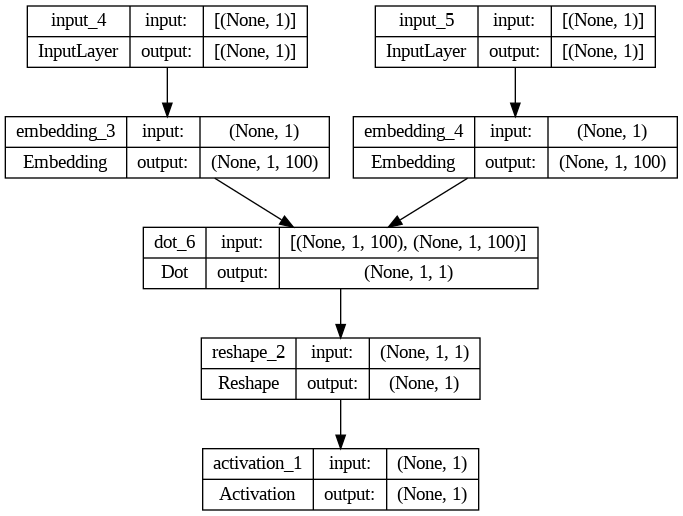

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss:', loss)

Epoch: 1 Loss: 0.03050800831988454
Epoch: 2 Loss: 0.030163449235260487
Epoch: 3 Loss: 0.029824664816260338
Epoch: 4 Loss: 0.02949152048677206
Epoch: 5 Loss: 0.029163898900151253
Epoch: 6 Loss: 0.02884167665615678
Epoch: 7 Loss: 0.028524737805128098
Epoch: 8 Loss: 0.02821296639740467
Epoch: 9 Loss: 0.027906255796551704
Epoch: 10 Loss: 0.027604494243860245
Epoch: 11 Loss: 0.027307576965540648
Epoch: 12 Loss: 0.027015403378754854
Epoch: 13 Loss: 0.02672787057235837
Epoch: 14 Loss: 0.026444886811077595
Epoch: 15 Loss: 0.026166353840380907
Epoch: 16 Loss: 0.025892179924994707
Epoch: 17 Loss: 0.02562227239832282
Epoch: 18 Loss: 0.02535655302926898
Epoch: 19 Loss: 0.025094924960285425
Epoch: 20 Loss: 0.024837316013872623
Epoch: 21 Loss: 0.024583636317402124
Epoch: 22 Loss: 0.02433381136506796
Epoch: 23 Loss: 0.024087764788419008
Epoch: 24 Loss: 0.023845417890697718
Epoch: 25 Loss: 0.02360669942572713
Epoch: 26 Loss: 0.023371539544314146
Epoch: 27 Loss: 0.023139866534620523
Epoch: 28 Loss: 0.0

In [ ]:
# Word2Vec 모델을 학습시키고 학습된 모델을 활용하여 단어간 유사도 측정
import gensim

In [ ]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size,embedding_dim))
vectors = model.get_weights()[0]
print(vectors)
print(len(vectors))

for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i-1, :])))))
f.close()

[[ 2.52859928e-02 -2.86434181e-02 -2.21706871e-02 ...  1.04572885e-02
   2.79939882e-02 -1.83241740e-02]
 [-3.39384496e-01 -1.84909016e-01 -4.67501998e-01 ...  5.25621235e-01
  -7.39728138e-02 -4.91868973e-01]
 [-2.92833894e-01 -3.93128425e-01 -5.41130066e-01 ...  2.41839588e-01
  -2.41525799e-01 -4.83281076e-01]
 ...
 [-4.10627574e-04  2.65335478e-02  2.77100913e-02 ...  4.71091159e-02
  -1.29897520e-03 -4.43711057e-02]
 [ 1.03915930e-02  1.28851421e-02  2.66520716e-02 ...  1.60696544e-02
   2.43942253e-02  2.88746245e-02]
 [ 2.21885368e-03 -3.09565663e-02  4.56753485e-02 ...  3.61813940e-02
   2.58933641e-02  3.01656462e-02]]
97284


In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['doctor'])

[('washington', 0.42358699440956116),
 ('4zt', 0.4224764108657837),
 ('osgiliath', 0.40760233998298645),
 ('hsp', 0.397729754447937),
 ('bresenhams', 0.390591025352478),
 ('zd3ii', 0.38964879512786865),
 ('p211', 0.3744364082813263),
 ('sminn', 0.37312495708465576),
 ('toyota', 0.37273961305618286),
 ('toasters', 0.37156179547309875)]

In [ ]:
w2v.most_similar(positive=['apple'])

[('4vl', 0.3977721035480499),
 ('northamericans', 0.39747849106788635),
 ('b58', 0.39146000146865845),
 ('bats', 0.38172265887260437),
 ('cheryl', 0.37515783309936523),
 ('acknowleding', 0.37222540378570557),
 ('h5cgc', 0.36972156167030334),
 ('45th', 0.36574405431747437),
 ('qrq', 0.3615466058254242),
 ('rubble', 0.3609218895435333)]

### 과제
[AI HUB](https://aihub.or.kr/) 에 공개되어 있는 한국어 데이터셋을 활용하여 한국어 워드 임베딩 구축